# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

$$
f'(x) = \arctan x + \dfrac{x}{1+x^2} - \dfrac{x}{1+x^2} = \arctan x = 0 \Leftrightarrow x = 0 \\
f''(x) = \dfrac{1}{1+x^2} \\
x_{k+1} = x_k - \dfrac{f'(x_k)}{f''(x_k)} = x_k - (1+x_k^2)\arctan x_k$$

Рассмотрим уравнение$|x-(1+x^2)\arctan{x}| = x$.

Оно имеет 2 решения: 0 и 1.39. Сходимость при $x^0 < 1.39$.

In [2]:
import numpy as np
import scipy.linalg as la
import math
import matplotlib.pyplot as plt
import time
import random

In [140]:
def f(x):
    return x * np.arctan(x) - 0.5 * np.log(1+x**2)

def grad(x):
    return np.arctan(x)

def hess(x):
    return 1/(1+x**2)

def error(x):
    #return grad(x)**2
    #return x**2
    return abs(x)

def ND(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        x = x - gamma(x,k) * (hess(x))**(-1) * grad(x)
        errs.append(error(x))

    return errs

# L = pi
def GD(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        x = x - gamma(x,k) * grad(x)
        errs.append(error(x))

    return errs

In [25]:
def risovach(errs, labels, title='', accuracy=False, accs=[]):

    plt.figure(figsize=(8, 5))

    for err, lab in zip(errs, labels):
        plt.plot(range(len(err)), [np.log(e) for e in err], label=lab)

    plt.xlabel("Номер итерации")
    plt.ylabel('Логарифм критерия')
    plt.title(title)
    plt.grid()
    plt.legend(fontsize=12)
    plt.show()

    if accuracy == True:
        plt.figure(figsize=(8, 5))
        for a, l in zip(accs, labels):
            plt.plot(range(len(a)), a, label=l)
        plt.xlabel("Номер итерации")
        plt.ylabel("Точность на тесте")
        plt.title(title)
        plt.grid()
        plt.legend(fontsize=12)
        plt.show()

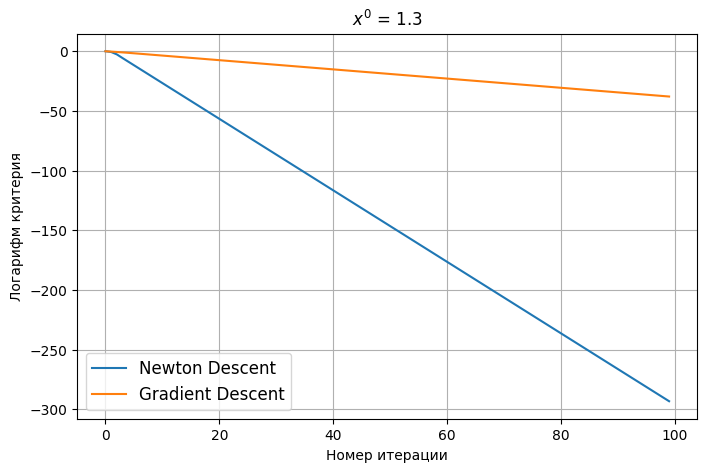

In [142]:
iters = 100
errs_ng = ND(1.3, gamma=lambda x, k: 0.95, iters=iters)
errs_gd = GD(1.3, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.3')

Метод Ньютона значительно опережает градиентный спуск по итерациям. 

При $\gamma = 1$ и $x^0 = 1.5$ он, как и было предсказано, не сходится.

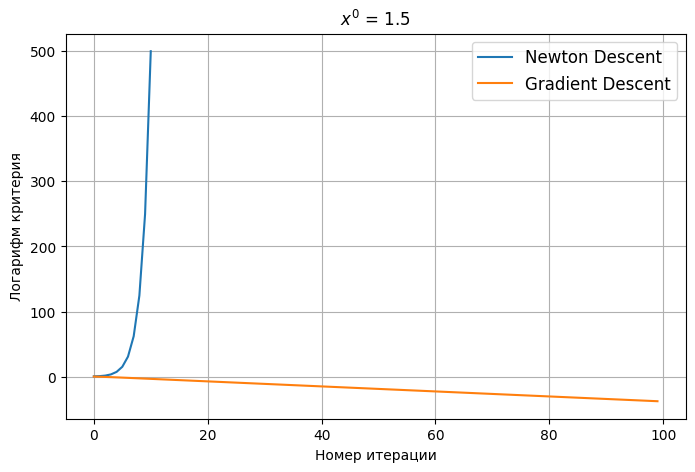

In [143]:
iters = 100
errs_ng = ND(1.5, gamma=lambda x, k: 1, iters=iters)
errs_gd = GD(1.5, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.5')

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

Если взять $\gamma = 0.8 < 1$, можно добиться сходимости метода Ньютона и из начальной $x^0 = 1.5$.

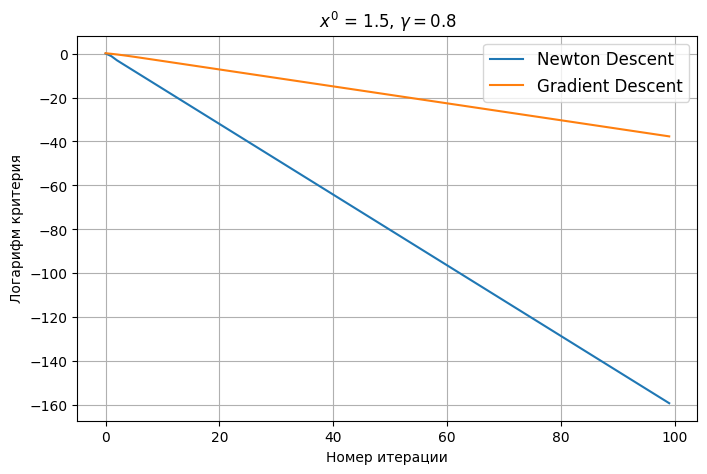

In [144]:
iters = 100
errs_ng = ND(1.5, gamma=lambda x, k: 0.8, iters=iters)
errs_gd = GD(1.5, gamma=lambda x, k: 0.32, iters=iters)
risovach(errs=[errs_ng, errs_gd], labels=['Newton Descent', 'Gradient Descent'], title=r'$x^0$ = 1.5, $\gamma = 0.8$')

Рассмотрим несколько стратегий: 
1. постоянный шаг;
2. уменьшающийся с 1 до 0;
3. увеличивающийся с 0 до 1;
4. правило Армихо.

In [145]:
def gamma_arm(x, k, eps=0.5, theta=0.99):
    gamma = 0.999
    while f(x) - f(x + gamma * grad(x)) > gamma * eps:
        gamma = gamma * theta
    return gamma

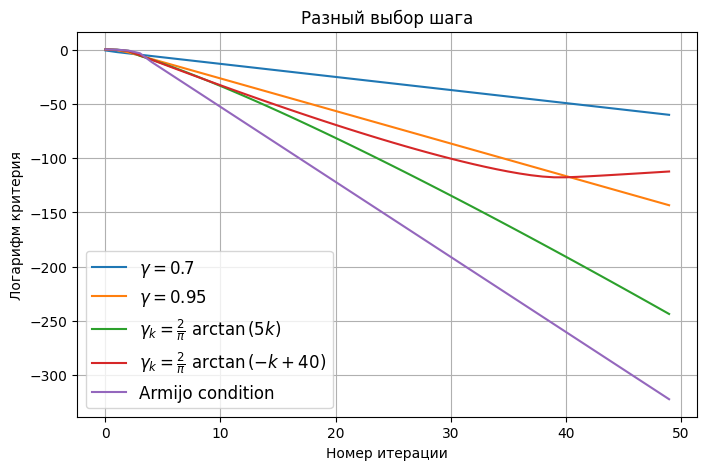

In [146]:
iters = 50
errs_const_1 = ND(1.3, gamma=lambda x, k: 0.7, iters=iters)
errs_const_2 = ND(1.3, gamma=lambda x, k: 0.95, iters=iters)
errs_incr = ND(1.3, gamma=lambda x, k: 2/3.1415 * np.arctan(5*k), iters=iters)
errs_decr = ND(1.3, gamma=lambda x, k: 2/3.1415 * np.arctan(-k + 40), iters=iters)
errs_arm = ND(1.3, gamma=gamma_arm, iters=iters)
risovach(errs=[errs_const_1, errs_const_2, errs_incr, errs_decr, errs_arm], 
         labels=[r'$\gamma = 0.7$', r'$\gamma = 0.95$', r'$\gamma_k = \frac{2}{\pi} \ \arctan{(5k)}$',
                 r'$\gamma_k = \frac{2}{\pi} \ \arctan{(-k + 40)} $', r'Armijo condition'], 
         title=r'Разный выбор шага')

Выводы:
1. постоянный шаг сходится лучше, если он близок к 1;
2. уменьшающийся шаг может расходиться;
3. увеличивающийся до 1 шаг показал себя очень неплохо;
4. в правиле Армихо следует брать начальный шаг $\gamma_0 \approx 1$, и большую $\theta \approx 0.9 - 0.99$.

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

In [14]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = "mushrooms.txt"
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

y = 2 * y - 3
n, d = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
n_train = X_train.shape[0]

L = 5.25
lambd = L/100
x0 = np.random.uniform(low=-L/5, high=L/5, size=(d,))

$f(w) =  \dfrac{1}{n}\sum\limits_{i=1}^n \ln(1+\exp(-w^Tx_iy_i)) + \dfrac{\lambda}{2}\|w\|^2$

$\nabla f (w) =  -\dfrac{1}{n}\sum\limits_{i=1}^n \dfrac{1}{1 + e^{w^Tx_iy_i}}x_iy_i + \lambda w$

$\nabla^2 f(w) = \dfrac{1}{n}\sum\limits_{i=1}^n \dfrac{e^{w^Tx_iy_i}}{(1 + e^{w^Tx_iy_i})^2}(x_ix_i^T) y_i^2 + \lambda I$

In [5]:
from numba import jit
import warnings
warnings.filterwarnings("ignore")

@jit
def fi(x, i):
    return np.log(1 + np.exp(-x.T @ (y_train[i] * X_train[i].T))) + lambd/2 * np.linalg.norm(x, ord=2)**2

@jit
def gradi(x, i):
    return -y_train[i]/(1 + np.exp(x.T @  (X_train[i].T * y_train[i]))) * X_train[i] + lambd * x

@jit
def hessi(x, i):
    ex = np.exp(x.T @  (X_train[i].T * y_train[i]))
    return ex / (1 + ex**2) * x @ x.T + lambd * np.eye(d)

@jit
def f(x):
    a = 0
    for i in range(n_train):
        a += fi(x, i)
    a = a/n_train
    return a

@jit
def grad(x):
    a = np.zeros(d)
    for i in range(n_train):
        a += gradi(x, i)
    a = a/n_train
    return a

@jit
def hess(x):
    a = np.zeros((d, d))
    for i in range(n_train):
        a += hessi(x, i)
    a = a/n_train
    return a

In [80]:
def error(x):
    return np.linalg.norm(grad(x), ord=2)**2

def ND(x0, gamma, iters=100):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        B = np.linalg.inv(hess(x))
        x = x - gamma(x,k) * B @ grad(x)
        errs.append(error(x))
        acc.append(accuracy_score(y_test, np.around(2 / (1 + np.exp(- X_test @ x))) - 1))

    return acc, errs, x

def GD(x0, gamma, iters=1000):
    
    x = x0
    errs = []
    acc = []

    for k in range(iters):
        x = x - gamma(x,k) * grad(x)
        errs.append(error(x))
        acc.append(accuracy_score(y_test, np.around(2 / (1 + np.exp(- X_test @ x))) - 1))

    return acc, errs, x

def GD_help(x0, method, gamma_gd, gamma_met=1, iters=1000, q=0.9, reverse=False):

    iters_gd = round(q * iters)
    iters_m = iters - iters_gd

    if reverse == True:
        acc_m, errs_m, x_m = method(x0, gamma=gamma_met, iters=iters_m)
        acc_gd, errs_gd, x_gd = GD(x_m, gamma=gamma_gd, iters=iters_gd)
        acc = np.concatenate([acc_m, acc_gd], axis=0)
        errs = np.concatenate([errs_m, errs_gd], axis=0)
    else:
        acc_gd, errs_gd, x_gd = GD(x0, gamma=gamma_gd, iters=iters_gd)
        acc_m, errs_m, x_m = method(x_gd, gamma=gamma_met, iters=iters_m)
        acc = np.concatenate([acc_gd, acc_m], axis=0)
        errs = np.concatenate([errs_gd, errs_m], axis=0)

    return acc, errs, x_m

In [56]:
iters = 200
acc, errs, _ = GD_help(x0, method=ND, gamma_gd=lambda x, k: 0.3, gamma_met=lambda x, k: 0.1, iters=iters, q=0.8)

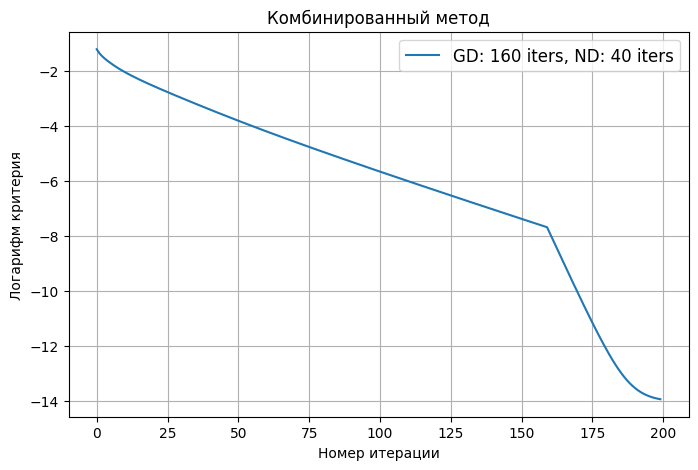

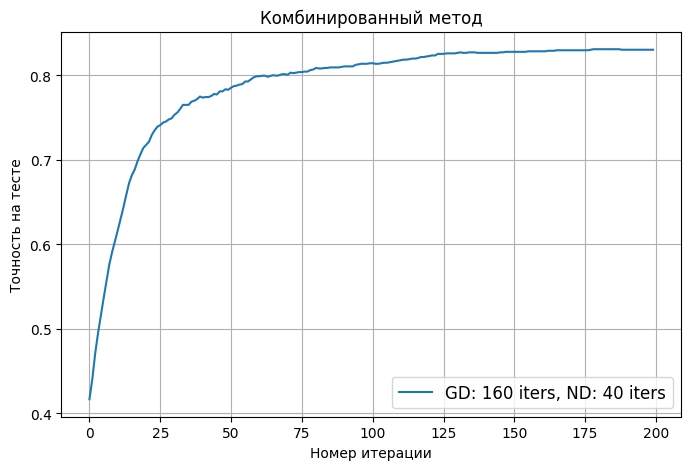

In [57]:
risovach(errs=[errs], 
         labels=[r'GD: 160 iters, ND: 40 iters'], 
         title=r'Комбинированный метод', 
         accuracy=True, accs=[acc])

На сходимости по критерию включение Ньютона сказалось очень сильно, на графике по точности такого скачка не наблюдается.

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [9]:
def gamma_wolfe(x, p, gamma0=1, theta=0.9, c1=1e-4, c2=0.9):
    gamma = gamma0
    while (f(x + gamma*p) > f(x) + c1 * gamma * float(grad(x).T @ p)) or (float(grad(x + gamma*p).T @ p) < c2 * float(grad(x).T @ p)):
        gamma *= theta
        if gamma < 1e-4:
            break
    return gamma

In [75]:
def Broyden(x0, gamma=1, iters=100):

    errs = []
    acc = []
    x = x0
    B = np.eye(d)

    for i in range(iters):

        x_prev = x
        p = - np.linalg.inv(B) @ grad(x)

        gamma = gamma_wolfe(x, p)
        x = x_prev + gamma * p

        s = x - x_prev
        s = s.reshape((d, 1))
        y = grad(x) - grad(x_prev)
        y = y.reshape((d, 1))
        
        B += ((y - B @ s) @ s.T) / (s.T @ s)

        errs.append(error(x))
        acc.append(accuracy_score(y_test, np.around(2 / (1 + np.exp(- X_test @ x))) - 1))
    
    return acc, errs, x

def DFP(x0, gamma=1, iters=1000):

    errs = []
    acc = []
    x = x0
    H = np.eye(d)

    for i in range(iters):

        x_prev = x
        p = - H @ grad(x)

        gamma = gamma_wolfe(x, p)
        x = x_prev + gamma * p

        s = x - x_prev
        s = s.reshape((d, 1))
        y = grad(x) - grad(x_prev)
        y = y.reshape((d, 1))
        yy = y.dot(y.T)
        h11 = (H @ (yy) @ H) 
        h22 = (y.T @ H @ y)
        H1 = - h11 / h22
        H2 = (s @ s.T) / (y.T @ s)
        H += H1 + H2

        errs.append(error(x))
        acc.append(accuracy_score(y_test, np.around(2 / (1 + np.exp(- X_test @ x))) - 1))
    
    return acc, errs, x

def BFGS(x0, gamma=1, iters=1000):

    errs = []
    acc = []
    x = x0
    H = np.eye(d)

    for i in range(iters):

        x_prev = x
        p = - H @ grad(x)

        gamma = gamma_wolfe(x, p)
        x = x_prev + gamma * p

        s = x - x_prev
        s = s.reshape((d, 1))
        y = grad(x) - grad(x_prev)
        y = y.reshape((d, 1))
        r = 1 / float(y.T @ s)
        I = np.eye(d)
        H = (I - r * (s @ y.T)) @ H @ (I - r * (y @ s.T)) + r * (s @ s.T)

        errs.append(error(x))
        acc.append(accuracy_score(y_test, np.around(2 / (1 + np.exp(- X_test @ x))) - 1))
    
    return acc, errs, x

def LBFGS(x0, gamma=1, iters=100):

    acc = []
    errs = []
    s1 = np.zeros(d).reshape((d,1))
    y1 = np.zeros(d).reshape((d,1))
    x = x0
    H = np.eye(d)

    for i in range(iters):

        p = -H @ grad(x0)
        gamma = gamma_wolfe(x, p)
        x = x0 + gamma * p

        s2 = x - x0
        y2 = grad(x) - grad(x0)
        s2 = s2.reshape((d,1))
        y2 = y2.reshape((d,1))
        gamma2 = 1./(s2.T @ y2)

        if i == 0:
            I = np.eye(d)
            H = (I - gamma2 * s2 @ y2.T) @ (I - gamma2 * y2 @ s2.T) + gamma2 * s2 @ s2.T
            s1 = np.copy(s2)
            y1 = np.copy(y1)
            gamma1 = gamma2
        else:
            I = np.eye(d)
            H = (I - gamma2 * s2 @y2.T) @ (I - gamma1 * s1 @ y1.T) @ (I - gamma1 * y1 @ s1.T) @ (I - gamma2 * y2 @ s2.T)
            H += gamma1 * (I - gamma2 * s2 @ y2.T) @ (s1 @ s1.T) @ (I - gamma2 * y2 @ s2.T) + gamma2 * (s2 @ s2.T)

        errs.append(error(x))
        acc.append(accuracy_score(y_test, np.round(2 / (1 + np.exp(- X_test @ x0))) - 1))
        x0 = x

    return acc, errs, x

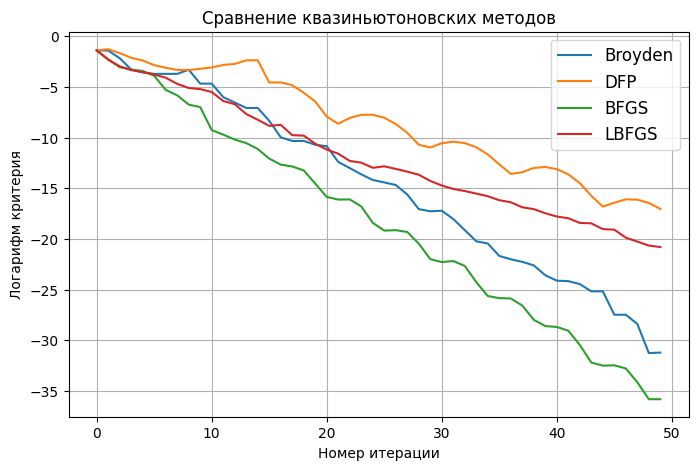

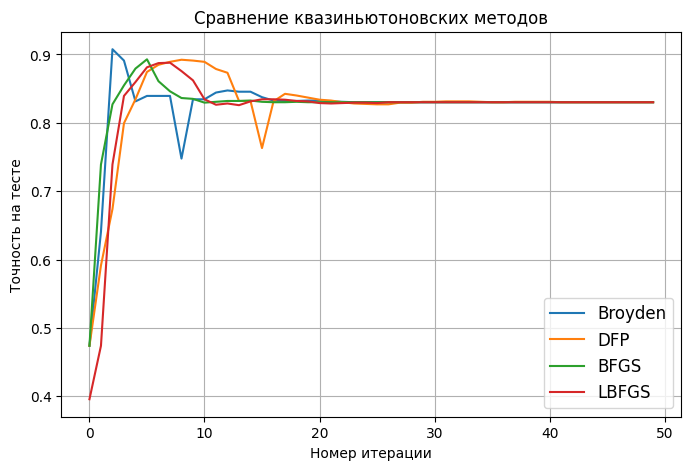

In [78]:
iters = 50
acc1, errs1, x1 = Broyden(x0, iters=iters)
acc2, errs2, x2 = DFP(x0, iters=iters)
acc3, errs3, x3 = BFGS(x0, iters=iters)
acc4, errs4, x4 = LBFGS(x0, iters=iters)
risovach(errs=[errs1, errs2, errs3, errs4], labels=['Broyden', 'DFP', 'BFGS', 'LBFGS'], 
         title='Сравнение квазиньютоновских методов', accuracy=True, accs=[acc1, acc2, acc3, acc4])

1. все методы довольно быстро вышли на плато точности, одинаковое для всех;
2. сходимость по норме градиента имелась и на больших итерациях; 
3. сошлись быстрее всего BFGS и Broyden.

Пытался пробить плато точности с помощью подводки обычным спуском. Не получилось. Да и сходимость толком не улучшилась.

Мы в этой работе сходимость по времени не замеряли, но я в этом эксперименте подбирал параметры так, чтобы оба запуска длились примерно одинаковое количество времени.

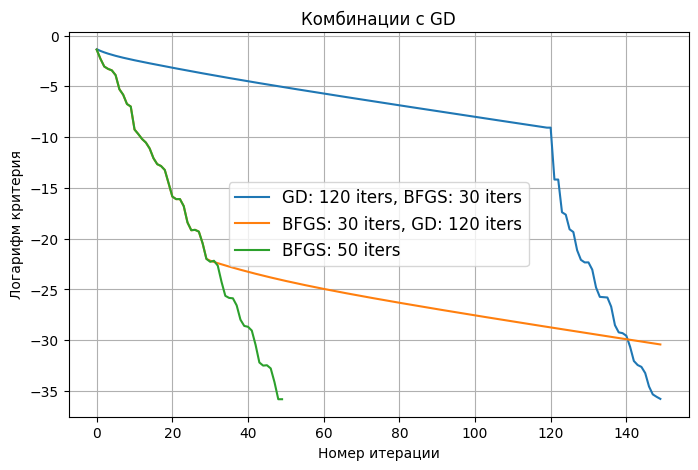

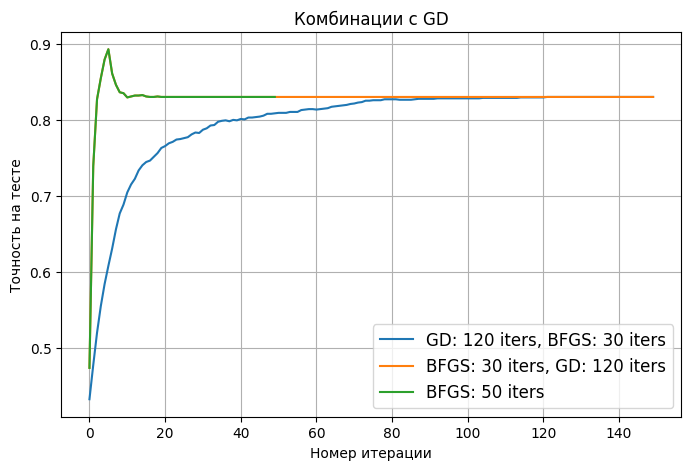

In [85]:
iters = 150
acc, errs, x = GD_help(x0, method=BFGS, gamma_gd=lambda x, k: 0.5, iters=iters, q=0.8)
acc1, errs1, x1 = GD_help(x0, method=BFGS, gamma_gd=lambda x, k: 0.5, iters=iters, q=0.8, reverse=True)
acc2, errs2, x2 = BFGS(x0, iters=50)

risovach(errs=[errs, errs1, errs2], labels=['GD: 120 iters, BFGS: 30 iters', 'BFGS: 30 iters, GD: 120 iters', 'BFGS: 50 iters'], 
         title='Комбинации с GD', accuracy=True, accs=[acc, acc1, acc2])

Заодно я попробовал провернуть и обратную процедуру: запуститься BFGSом, продолжить GDшкой.

1. все подходы отработали примерно на одну точность и сходимость;
2. примечательно то, что первый запуск показал себя лучше второго по сходимости, то есть от порядка запуска методов зависит их результат; 

Как и подсказывала интуиция, лучше сошелся тот метод, который начинался с GD :)

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [ ]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [ ]:
#ответ